In [2]:
student_math <- read.csv(file = 'student-mat.csv', sep = ";", header = TRUE)

In [4]:
str(student_math)

'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [5]:
install.packages('dplyr')
install.packages("rpart.plot")

also installing the dependencies 'ellipsis', 'fansi', 'pkgconfig', 'purrr', 'cli', 'utf8', 'generics', 'glue', 'lifecycle', 'magrittr', 'R6', 'rlang', 'tibble', 'tidyselect', 'vctrs', 'pillar'




  There are binary versions available but the source versions are later:
           binary source needs_compilation
fansi       0.4.2  1.0.3              TRUE
cli         2.5.0  3.3.0              TRUE
utf8        1.2.1  1.2.2              TRUE
generics    0.1.0  0.1.2             FALSE
glue        1.4.2  1.6.2              TRUE
lifecycle   1.0.0  1.0.1             FALSE
magrittr    2.0.1  2.0.3              TRUE
R6          2.5.0  2.5.1             FALSE
rlang      0.4.11  1.0.2              TRUE
tibble      3.1.1  3.1.7              TRUE
tidyselect  1.1.1  1.1.2              TRUE
vctrs       0.3.8  0.4.1              TRUE
pillar      1.6.0  1.7.0             FALSE
dplyr       1.0.6  1.0.9              TRUE

  Binaries will be installed
package 'ellipsis' successfully unpacked and MD5 sums checked
package 'fansi' successfully unpacked and MD5 sums checked
package 'pkgconfig' successfully unpacked and MD5 sums checked
package 'purrr' successfully unpacked and MD5 sums checked
package 

installing the source packages 'generics', 'lifecycle', 'R6', 'pillar'

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [4]:
library(dplyr)
library(magrittr)
library('rpart')
library('rpart.plot')

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'magrittr' was built under R version 3.6.3"Warning message:
"package 'rpart' was built under R version 3.6.3"

In [8]:
create_train_test <- function(df, size = 0.8, train = TRUE) {
    n_row = nrow(df)
    total_row = size * n_row
    train_sample <- 1: total_row
    if (train == TRUE) {
        return (df[train_sample, ])
    } else {
        return (df[-train_sample, ])
    }
}

In [10]:
data_train <- create_train_test(df, 0.8, train = TRUE)
data_test <- create_train_test(df, 0.8, train = FALSE)

In [11]:
dim(data_train)
dim(data_test)

[1] 316  33

[1] 79 33

In [12]:
prop.table(table(data_train$G3))


          0           4           5           6           7           8 
0.085443038 0.003164557 0.015822785 0.044303797 0.022151899 0.085443038 
          9          10          11          12          13          14 
0.063291139 0.132911392 0.123417722 0.088607595 0.075949367 0.072784810 
         15          16          17          18          19          20 
0.079113924 0.037974684 0.015822785 0.037974684 0.012658228 0.003164557 

Warning message:
"All boxes will be white (the box.palette argument will be ignored) because
the number of classes in the response 18 is greater than length(box.palette) 6.
To silence this warning use box.palette=0 or trace=-1."

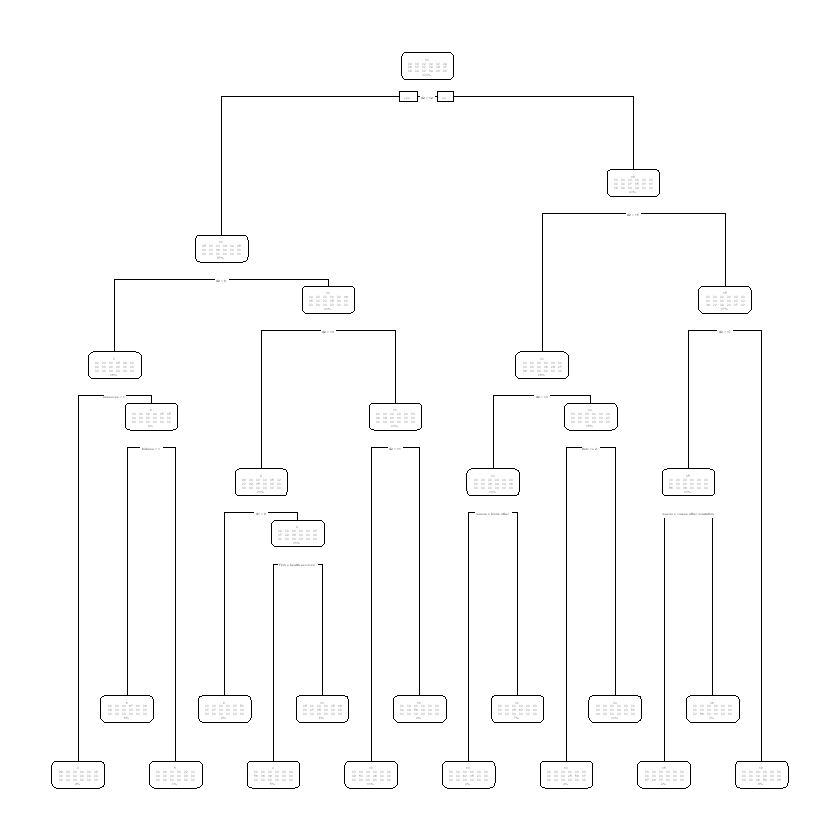

In [14]:
fit <- rpart(G3~., data = data_train, method = 'class')
rpart.plot(fit, extra = 104)

In [7]:
clean_df <- df %>% mutate(G3 = factor(G3, levels = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20), labels = c('fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'sufficient', 'sufficient', 'satisfactory', 'satisfactory', 'good', 'good', 'excellent', 'excellent', 'excellent', 'excellent', 'excellent'))) %>% na.omit()

[1] fail         fail         sufficient   good         sufficient  
  [6] good         sufficient   fail         excellent    good        
 [11] fail         satisfactory good         sufficient   excellent   
 [16] good         good         sufficient   fail         sufficient  
 [21] good         good         excellent    satisfactory fail        
 [26] fail         sufficient   good         sufficient   sufficient  
 [31] satisfactory excellent    excellent    satisfactory good        
 [36] fail         excellent    good         sufficient   satisfactory
 [41] sufficient   satisfactory excellent    sufficient   fail        
 [46] fail         sufficient   excellent    good         fail        
 [51] satisfactory satisfactory sufficient   sufficient   satisfactory
 [56] sufficient   good         good         fail         excellent   
 [61] sufficient   sufficient   fail         fail         sufficient  
 [66] good         satisfactory fail         fail         excellent   
 [71] good         sufficient   fail         good         sufficient  
 [76] sufficient   sufficient   sufficient   sufficient   fail        
 [81] satisfactory sufficient   fail         good         sufficient  
 [86] fail         fail         good         sufficient   fail        
 [91] fail         excellent    fail         sufficient   good        
 [96] sufficient   good         sufficient   good         fail        
[101] fail         excellent    good         fail         excellent   
[106] sufficient   fail         excellent    satisfactory excellent   
[111] excellent    sufficient   satisfactory excellent    fail        
[116] excellent    good         satisfactory fail         satisfactory
[121] good         good         satisfactory satisfactory fail        
[126] satisfactory sufficient   fail         excellent    satisfactory
[131] sufficient   satisfactory good         fail         sufficient  
[136] satisfactory sufficient   sufficient   sufficient   good        
[141] sufficient   satisfactory fail         satisfactory sufficient  
[146] good         satisfactory fail         sufficient   fail        
[151] satisfactory sufficient   excellent    good         excellent   
[156] sufficient   fail         fail         sufficient   fail        
[161] fail         sufficient   fail         satisfactory excellent   
[166] fail         satisfactory sufficient   sufficient   good        
[171] fail         sufficient   satisfactory fail         fail        
[176] sufficient   good         good         excellent    sufficient  
[181] excellent    sufficient   excellent    sufficient   sufficient  
[186] fail         sufficient   fail         fail         satisfactory
[191] sufficient   fail         fail         satisfactory good        
[196] fail         sufficient   good         fail         fail        
[201] fail         sufficient   fail         excellent    satisfactory
[206] good         fail         good         satisfactory fail        
[211] satisfactory good         sufficient   fail         satisfactory
[216] fail         sufficient   satisfactory satisfactory sufficient  
[221] satisfactory satisfactory satisfactory excellent    satisfactory
[226] fail         fail         good         fail         sufficient  
[231] fail         fail         satisfactory fail         satisfactory
[236] sufficient   good         excellent    fail         satisfactory
[241] fail         excellent    sufficient   sufficient   sufficient  
[246] fail         good         sufficient   good         sufficient  
[251] satisfactory fail         fail         fail         sufficient  
[256] fail         sufficient   satisfactory sufficient   sufficient  
[261] sufficient   excellent    satisfactory good         good        
[266] sufficient   good         satisfactory excellent    good        
[271] sufficient   fail         good         excellent    sufficient  
[276] sufficient   good         excellent    satisfactory satisfactory
[281] excellent    fail   

In [2]:
levels = c(1:9, 10:11, 12:13, 14:15, 16:20)
levels

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20